### LAB: DNN with keras and tensorflow

**Example 1: MNIST dataset (Digit recognition dataset)**

MNIST is available as a keras dataset (mnist)

Inputs: images of 28 x 28 pixels

Output: class representing the digit (10 classes, digitos 0-9)

60k images for training and 10k images for test

In [30]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

#Check data dimensions

print(f"train image shape: {train_images.shape}")
print(f"train label shape: {train_labels.shape}")
print(f"test image shape: {test_images.shape}")
print(f"test label shape: {test_labels.shape}")

train image shape: (60000, 28, 28)
train label shape: (60000,)
test image shape: (10000, 28, 28)
test label shape: (10000,)


### Data pre-processing

**Classification problem => Convert outputs into categorical variables**

In [31]:
from tensorflow.keras.utils import to_categorical

# TODO check if reshape is current way to do it

m_train = train_images.shape[0]

# Reshape to make the images into 1D vector  for each example
train_images = train_images.reshape([m_train, 28*28])

#Standardize values /255
train_images = train_images.astype('float32') / 255

#Convert outputs into categorical variables 
train_labels = to_categorical(train_labels)

#Do the same for the test data

m_test = test_images.shape[0]
# Reshape to make the images into 1D vector  for each example
test_images = test_images.reshape([m_test, 28*28])
#Standardize values /255
test_images = test_images.astype('float32') / 255
#Convert outputs into categorical variables 
test_labels = to_categorical(test_labels)

### Model structure (feedforward DNN)

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

#One hidden layer with 512 neurons (RelU)
network.add(layers.Dense(512, activation='relu', 
                         input_shape=(28 * 28,)))

# Output layer with 10 neurons
# (softmax = 1 neuron for each class; one-hot encoding )
network.add(layers.Dense(10, activation='softmax'))

### DNN training

In [33]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#train the model (fit)
history= network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2620 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1070 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0706 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0509 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0388 - accuracy: 0.9883


***history.history* is a dictionary, check what are the keys, extract their values and plot them. You are expected to get similar plots as below.** 


<img src="https://github.com/renanaferreira/CAA-repository/blob/main/Lab3/images/f1.jpg?raw=true" style="width:250px;height:150px;">

<img src="https://github.com/renanaferreira/CAA-repository/blob/main/Lab3/images/f2.jpg?raw=true" style="width:250px;height:150px;">

dict_keys(['loss', 'accuracy'])


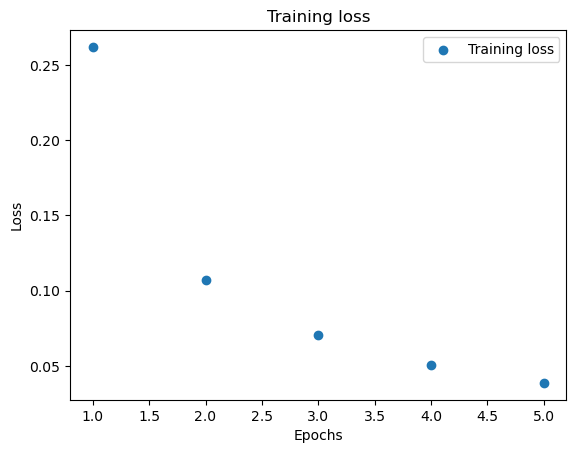

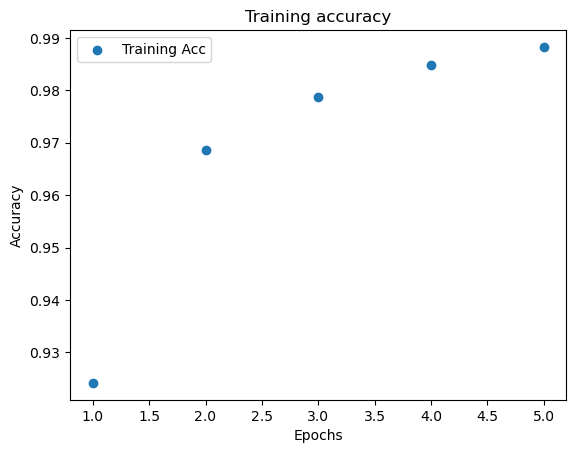

In [34]:
import matplotlib.pyplot as plt

## show history keys
print(history.history.keys())

loss = history.history['loss']
acc = history.history['accuracy']

# plot loss
plt.scatter(range(1,len(loss)+1), loss)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training loss"], loc="upper right")
plt.show()

# plot acc
plt.scatter(range(1,len(acc)+1), acc)
plt.title("Training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training Acc"], loc="upper left")
plt.show()

**Predict the outputs (with *network.predict*)  for test images with the trained DNN network**. 

In [35]:
test_preds = network.predict(test_images)

# test_preds contains the class probabilities, what is its dimension ?

print(test_preds.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [36]:
#(choose the class with max probabilities)
test_classes = np.argmax(network.predict(test_images), axis=-1)

#what is the dimension of test_classes ?
print(test_classes.shape)

313/313 [==============================] - 1s 3ms/step
(10000,)


### Evaluate the trained model for test and train images

In [37]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose =0)
print(test_loss, test_acc)

#Do the same for train data. Compare the results 
train_loss, train_acc = network.evaluate(train_images, train_labels, verbose=0)
print(train_loss, train_acc)

0.06160645931959152 0.9811999797821045
0.025935452431440353 0.9930499792098999


### Example 2:  DNN classifier for IMDB dataset

Dataset with texts of reviews in IMDB about movies; classified into 2 
classes: positive or negative

25k reviews for training + 25k for test; 

balanced – 50% positive and negative examples

IMDB is available as a keras dataset (imdb)

We will only consider the most common 10k words

In [39]:
from tensorflow.keras.datasets import imdb

#Use text dictionary with num_words=10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [26]:
#Check dimensions of train and test data, labels
print(f"train data shape: {train_data.shape}")
print(f"train label shape: {train_labels.shape}")
print(f"test data shape: {test_data.shape}")
print(f"test label shape: {test_labels.shape}")

#what is the content of train_data and train_labels ? 
print("---- train data ----")
print(train_data)
print("---- train labels ----")
print(train_labels)

#Print the content of the first review 
print("---- 1st review ----")
print(train_data[0])
#The number of words in each review are different 
# How many words are in review 1, review 4

print("1st review num words")
print(len(train_data[0]))
print("4rd review num words")
print(len(train_data[3]))
# ANSWER: 218 words / #550 words 

#What is the class of the first review
print("1st review class")
print(train_labels[0])

train data shape: (25000,)
train label shape: (25000,)
test data shape: (25000,)
test label shape: (25000,)
---- train data ----
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 13

**Transform the word indices back into words** 

In [41]:
print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

9999
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [61]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#One-hot encoding of the reviews (binary vectors)

#TODO how this processing occurs

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Output to binary (0 / 1 Classes) 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(25000, 10000)
(25000, 10000)
(25000,)


### Model structure (fully connected feedforward DNN)

Implements DNN  with 2 hidden layers; 

16 neurons in each hidden layers; RelU

Output layer – sigmoid – binary classification

In [70]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(
    layers.Dense(16, activation='relu', input_shape=(10000,))
)
model.add(
    layers.Dense(16, activation='relu')
)

model.add(
    layers.Dense(1, activation='sigmoid')
)



### DNN Model training  for IMDB dataset

In [71]:
# Compile the model with optimizer (RMSprop), 
# loss function (binary_crossentropy ) and error metric (accuracy)

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#Split train data into: 
# validation data (the first 10000 reviews in x_train)
# train data (the remaining reviews in x_train )

x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

#Fit the model with partial train data and validation data 
#(check model.fit function of keras)
epochs = 20
history = model.fit(x=partial_x_train, y=partial_y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=512)

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5322 - accuracy: 0.7811 - val_loss: 0.3982 - val_accuracy: 0.8702
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3273 - accuracy: 0.8925 - val_loss: 0.3120 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2448 - accuracy: 0.9181 - val_loss: 0.2907 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1986 - accuracy: 0.9339 - val_loss: 0.2747 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1657 - accuracy: 0.9448 - val_loss: 0.2751 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1440 - accuracy: 0.9530 - val_loss: 0.2843 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1236 - accuracy: 0.9599 - val_loss: 0.3122 - val_accuracy: 0.8774
Epoch 8/20
30

Plot results similar to the figures below. 

<img src="https://github.com/renanaferreira/CAA-repository/blob/main/Lab3/images/f3.jpg?raw=true" style="width:250px;height:150px;">

<img src="https://github.com/renanaferreira/CAA-repository/blob/main/Lab3/images/f4.jpg?raw=true" style="width:250px;height:150px;">

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


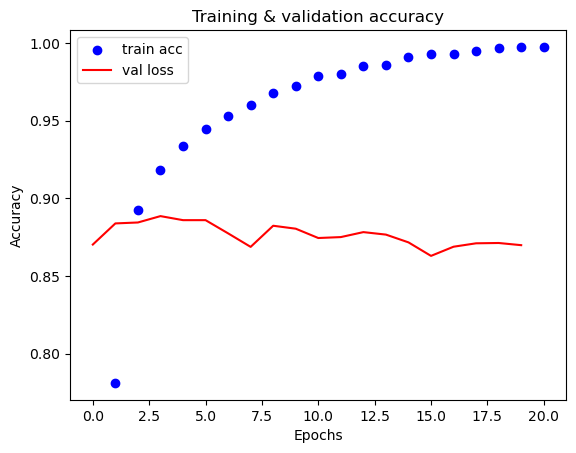

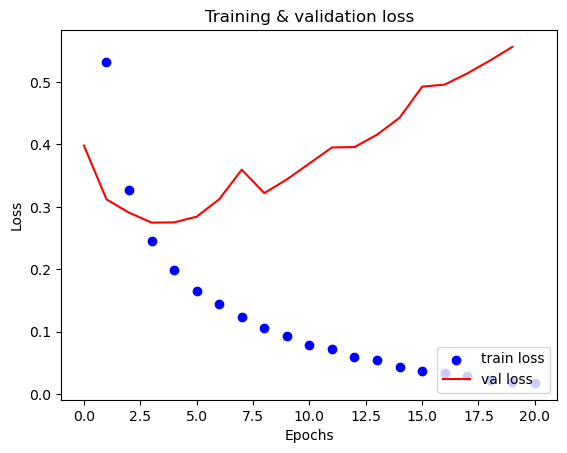

In [73]:
import matplotlib.pyplot as plt

## show history keys
print(history.history.keys())

# plot acc
plt.scatter(range(1, epochs+1), history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="r")
plt.title("Training & validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train acc", "val loss"], loc="upper left")
plt.show()

# plot loss
plt.scatter(range(1, epochs+1), history.history['loss'], c="b")
plt.plot(history.history['val_loss'], c="r")
plt.title("Training & validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train loss","val loss"], loc="lower right")
plt.show()

In [75]:
# Predict test data 
test_preds = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [78]:
# Evaluate the model on train data. 
# what are the loss and the accuracy ?

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(train_loss, train_acc)

# Do the same for test data and compare
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)

0.22871997952461243 0.9476799964904785
0.6017320156097412 0.8583999872207642


#### Overfitting issues - change the number of hidden layer units

If you observe a significant difference (7%, 8%) between train and test accuracy, try different approaches. 

Change the number of hidden layer units (h). 

Epoch 1/20
118/118 [==============================] - 3s 16ms/step - loss: 0.5713 - accuracy: 0.7453 - val_loss: 0.4902 - val_accuracy: 0.8206
Epoch 2/20
118/118 [==============================] - 1s 9ms/step - loss: 0.4170 - accuracy: 0.8877 - val_loss: 0.3882 - val_accuracy: 0.8832
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2748 - accuracy: 0.9247 - val_loss: 0.2899 - val_accuracy: 0.8866
Epoch 4/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1816 - accuracy: 0.9401 - val_loss: 0.2853 - val_accuracy: 0.8837
Epoch 5/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1457 - accuracy: 0.9520 - val_loss: 0.3107 - val_accuracy: 0.8828
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1192 - accuracy: 0.9614 - val_loss: 0.3055 - val_accuracy: 0.8858
Epoch 7/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0985 - accuracy: 0.9687 - val_loss: 0.3322 - val_accuracy: 0.8813
Epoch

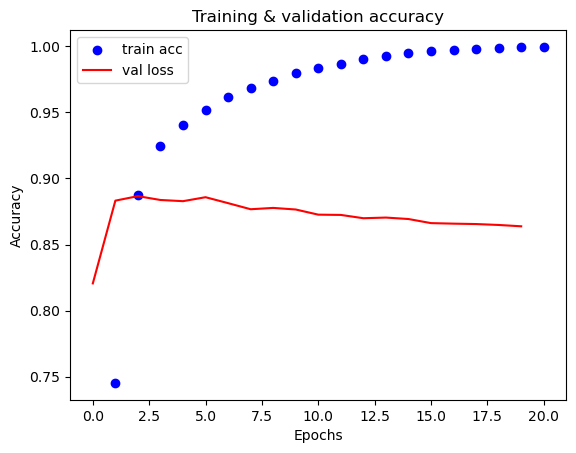

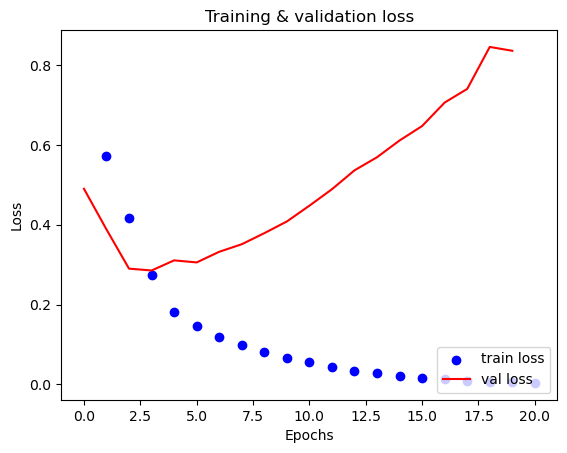

0.3356485962867737 0.9453999996185303
0.8912641406059265 0.8506799936294556


In [80]:
# For example, repeat all training and testing process with h = 4 or 8. 
hidden = 4  

#build the model
model_u4 = models.Sequential()
model_u4.add(layers.Dense(hidden, activation="relu", input_shape=(10000,)))
model_u4.add(layers.Dense(hidden, activation="relu"))
model_u4.add(layers.Dense(1, activation="sigmoid"))
model_u4.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#fit the model

epochs=20
history = model_u4.fit(x=partial_x_train, y=partial_y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=128)
#plot train and val acc, train and val loss during the training
plt.scatter(range(1, epochs+1), history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="r")
plt.title("Training & validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train acc", "val loss"], loc="upper left")
plt.show()

plt.scatter(range(1, epochs+1), history.history['loss'], c="b")
plt.plot(history.history['val_loss'], c="r")
plt.title("Training & validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train loss","val loss"], loc="lower right")
plt.show()

# evaluate the model, what are the train and test final accuracies 
train_loss, train_acc = model_u4.evaluate(x_train, y_train, verbose=0)
print(train_loss, train_acc)

# Do the same for test data and compare
test_loss, test_acc = model_u4.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)

### Overfitting issues - Regularization  L2

Apply L2, but it can be changed to L1 or L1+ L2: for example

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001) 

Epoch 1/20
118/118 [==============================] - 3s 16ms/step - loss: 0.4467 - accuracy: 0.8411 - val_loss: 0.3924 - val_accuracy: 0.8493
Epoch 2/20
118/118 [==============================] - 1s 10ms/step - loss: 0.2738 - accuracy: 0.9148 - val_loss: 0.3356 - val_accuracy: 0.8819
Epoch 3/20
118/118 [==============================] - 1s 11ms/step - loss: 0.2341 - accuracy: 0.9317 - val_loss: 0.3349 - val_accuracy: 0.8842
Epoch 4/20
118/118 [==============================] - 1s 11ms/step - loss: 0.2113 - accuracy: 0.9413 - val_loss: 0.3705 - val_accuracy: 0.8749
Epoch 5/20
118/118 [==============================] - 1s 10ms/step - loss: 0.1960 - accuracy: 0.9469 - val_loss: 0.4094 - val_accuracy: 0.8666
Epoch 6/20
118/118 [==============================] - 2s 19ms/step - loss: 0.1851 - accuracy: 0.9515 - val_loss: 0.4155 - val_accuracy: 0.8666
Epoch 7/20
118/118 [==============================] - 1s 10ms/step - loss: 0.1741 - accuracy: 0.9551 - val_loss: 0.4108 - val_accuracy: 0.8675

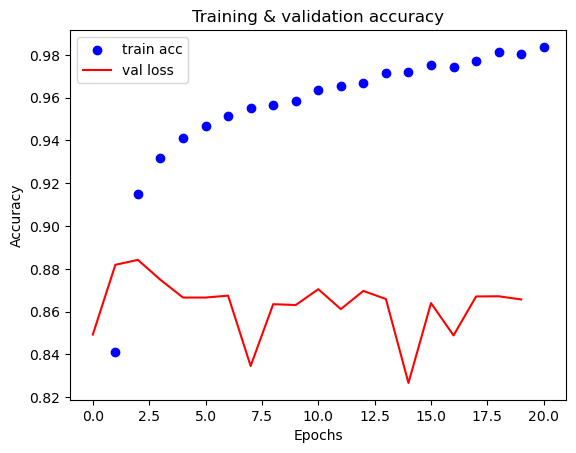

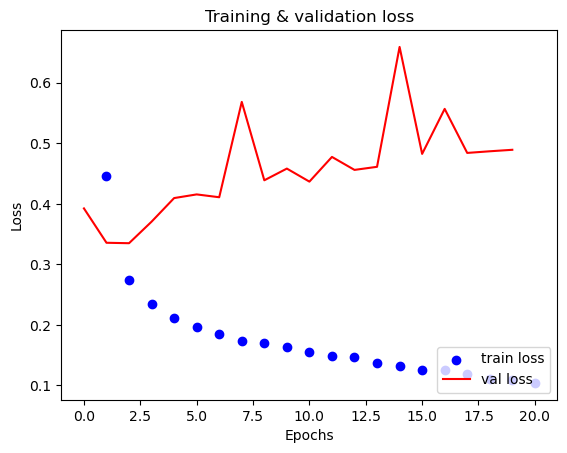

0.24226586520671844 0.944599986076355
0.5218453407287598 0.855400025844574


In [81]:
from tensorflow.keras import regularizers

hidden = 16

model_l2 = models.Sequential()

model_l2.add(layers.Dense(hidden, activation='relu', 
  kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)))

model_l2.add(layers.Dense(hidden, activation='relu', 
  kernel_regularizer=regularizers.l2(0.001)))

model_l2.add(layers.Dense(1, activation='sigmoid'))

#Compile and fit the model 
model_l2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs=20
history = model_l2.fit(x=partial_x_train, y=partial_y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=128)
#plot train and val acc, train and val loss during the training
plt.scatter(range(1, epochs+1), history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="r")
plt.title("Training & validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train acc", "val loss"], loc="upper left")
plt.show()

plt.scatter(range(1, epochs+1), history.history['loss'], c="b")
plt.plot(history.history['val_loss'], c="r")
plt.title("Training & validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train loss","val loss"], loc="lower right")
plt.show()
# evaluate the model, what are the train and test final accuracies 
train_loss, train_acc = model_l2.evaluate(x_train, y_train, verbose=0)
print(train_loss, train_acc)

# Do the same for test data and compare
test_loss, test_acc = model_l2.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)

### Overfitting issues - Regularization  L1

Apply now Regularization  L1 for the same model and repeat the whole training and testing process. 

In [ ]:
?

### Overfitting issues - dropout

In [ ]:
model_dr = models.Sequential()
model_dr.add(layers.Dense(hidden, activation='relu', 
                          input_shape=(10000,)))
model_dr.add(layers.Dropout(0.5))

model_dr.add(layers.Dense(hidden, activation='relu'))
model_dr.add(layers.Dropout(0.5))

model_dr.add(layers.Dense(1, activation='sigmoid'))


#Compile and fit the model 
?
#plot train and val acc, train and val loss during the training
?
# evaluate the model, what are the train and test final accuracies 
?


### Overfitting issues -  EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', 
                       input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

early = EarlyStopping(monitor='val_loss', min_delta=0, patience= 5, 
                      verbose= True, mode='auto')

callbacks = [early]
history_es = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callbacks)

#plot train and val acc, train and val loss during the training
?
# evaluate the model, what are the train and test final accuracies 
?

### Overfitting issues -  Dropout & EarlyStopping

Aplly a combination of mechanisms to deal with overfitting.